In [1]:
import numpy as np
import math
import random
import os

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers as opt
import tensorflow.keras.layers as lr
import tensorflow.keras.metrics as metrics
from   tensorflow.keras.models import Sequential

import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

print("Imported packages.")
print(tf.__version__)

Imported packages.
2.1.0


# Loading data

## Loading the data generated through simulation

In [2]:
X_data = np.load(os.path.join("data", "MergedData", "InputData.npy"))
Y_data = np.load(os.path.join("data", "MergedData", "OutputData.npy"))
print("Loaded training data.")
print("X_data shape:", X_data.shape)
print("Y_data shape:", Y_data.shape)
assert X_data.shape[0] == Y_data.shape[0], "Not the same amount of input and output data."

Loaded training data.
X_data shape: (10194, 56)
Y_data shape: (10194,)


In [3]:
X_data, Y_data = sk.utils.shuffle(X_data, Y_data, random_state=0)
print("Shuffled data.")

Shuffled data.


## Splitting the data into training and testing sets

In [4]:
TRAIN_PROPORTION = 0.8
split_index = int((len(X_data)-1)*TRAIN_PROPORTION)
splited_X_data = np.split(X_data, [split_index, len(X_data)])
splited_Y_data = np.split(Y_data, [split_index, len(Y_data)])

X_train, X_test = splited_X_data[0], splited_X_data[1]
Y_train, Y_test = splited_Y_data[0], splited_Y_data[1]

# Cleaning uneccessary variables
del splited_X_data
del splited_Y_data
del split_index
del TRAIN_PROPORTION

print("Splitted data into training and testing sets.")
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Splitted data into training and testing sets.
X_train shape: (8154, 56)
Y_train shape: (8154,)
X_test shape: (2040, 56)
Y_test shape: (2040,)


# Training a simple model

## Defining model 

The API used is tensorflow.keras as it is powerful and easy to use.

The model itself only has Dense layers since there is no spacial information yet


In [5]:
def create_model(input_shape, output_shape):
    model = Sequential([
        lr.Dense(units=input_shape, activation='relu', input_dim=input_shape),
        lr.Flatten(),
        lr.Dropout(0.2),
        lr.Dense(units=56, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=28, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=14, activation='relu'),
        lr.Dropout(0.2),
        lr.Dense(units=7, activation='relu'),
        lr.Dense(units=output_shape, activation='tanh')
    ])

    model.compile(optimizer=opt.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0000001),
              loss="mean_absolute_error",
              metrics=['accuracy'])
    return model

In [6]:
model = create_model(X_train[0].shape[0], 1)

## Training the model

First, there is a check on the availability of a GPU. If you have an NVIDIA GPU on your computer, make sure CUDA 10.0, 10.1 and 10.2 are installed, are they are used by tensorlflow.

In [7]:
NB_EPOCHS = 2500
BATCH_SIZE = 750

In [8]:
# Training Model on GPU if available
list_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(list_devices))
print("Using GPU: ", list_devices[0] if len(list_devices) > 0 else False)

Num GPUs Available:  1
Using GPU:  PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [9]:
# Training model_tilte_1
device = tf.device('/GPU:0') if len(list_devices) > 0 else tf.device('/CPU:0')
with tf.device('/GPU:0'):
    history = model.fit(X_train, Y_train,
                        epochs=NB_EPOCHS, batch_size=BATCH_SIZE,
                        validation_data=(X_test, Y_test),
                        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=1000,
                                                        restore_best_weights=True)])

Train on 8154 samples, validate on 2040 samples
Epoch 1/2500
8154/8154 [==============================] - 0s 60us/sample - loss: 0.5156 - accuracy: 8.5847e-04 - val_loss: 0.4246 - val_accuracy: 0.0000e+00
Epoch 2/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.4354 - accuracy: 6.1320e-04 - val_loss: 0.4176 - val_accuracy: 0.0000e+00
Epoch 3/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.4169 - accuracy: 6.1320e-04 - val_loss: 0.4135 - val_accuracy: 0.0000e+00
Epoch 4/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.4088 - accuracy: 6.1320e-04 - val_loss: 0.4121 - val_accuracy: 0.0000e+00
Epoch 5/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.4009 - accuracy: 6.1320e-04 - val_loss: 0.4082 - val_accuracy: 0.0000e+00
Epoch 6/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.3975 - accuracy: 6.1320e-04 - val_loss: 0.4032 - val_accuracy: 0.0000e+00
Epoch 7/2500
81

8154/8154 [==============================] - 0s 3us/sample - loss: 0.2160 - accuracy: 0.0022 - val_loss: 0.1825 - val_accuracy: 4.9020e-04
Epoch 54/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2153 - accuracy: 0.0023 - val_loss: 0.1853 - val_accuracy: 4.9020e-04
Epoch 55/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2125 - accuracy: 0.0017 - val_loss: 0.1825 - val_accuracy: 4.9020e-04
Epoch 56/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2120 - accuracy: 0.0021 - val_loss: 0.1807 - val_accuracy: 4.9020e-04
Epoch 57/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2080 - accuracy: 0.0022 - val_loss: 0.1797 - val_accuracy: 4.9020e-04
Epoch 58/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2072 - accuracy: 0.0023 - val_loss: 0.1789 - val_accuracy: 4.9020e-04
Epoch 59/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.2068 - accura

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1682 - accuracy: 0.0023 - val_loss: 0.1495 - val_accuracy: 4.9020e-04
Epoch 107/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1679 - accuracy: 0.0026 - val_loss: 0.1520 - val_accuracy: 4.9020e-04
Epoch 108/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1657 - accuracy: 0.0022 - val_loss: 0.1507 - val_accuracy: 4.9020e-04
Epoch 109/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1659 - accuracy: 0.0025 - val_loss: 0.1507 - val_accuracy: 4.9020e-04
Epoch 110/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1673 - accuracy: 0.0026 - val_loss: 0.1523 - val_accuracy: 4.9020e-04
Epoch 111/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1670 - accuracy: 0.0025 - val_loss: 0.1517 - val_accuracy: 4.9020e-04
Epoch 112/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1657 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1486 - accuracy: 0.0025 - val_loss: 0.1487 - val_accuracy: 9.8039e-04
Epoch 160/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1490 - accuracy: 0.0026 - val_loss: 0.1480 - val_accuracy: 4.9020e-04
Epoch 161/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1489 - accuracy: 0.0026 - val_loss: 0.1484 - val_accuracy: 4.9020e-04
Epoch 162/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1480 - accuracy: 0.0026 - val_loss: 0.1432 - val_accuracy: 4.9020e-04
Epoch 163/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1504 - accuracy: 0.0025 - val_loss: 0.1428 - val_accuracy: 4.9020e-04
Epoch 164/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1496 - accuracy: 0.0025 - val_loss: 0.1501 - val_accuracy: 4.9020e-04
Epoch 165/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1483 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1398 - accuracy: 0.0026 - val_loss: 0.1439 - val_accuracy: 9.8039e-04
Epoch 213/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1376 - accuracy: 0.0025 - val_loss: 0.1437 - val_accuracy: 9.8039e-04
Epoch 214/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1397 - accuracy: 0.0026 - val_loss: 0.1416 - val_accuracy: 9.8039e-04
Epoch 215/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1390 - accuracy: 0.0026 - val_loss: 0.1443 - val_accuracy: 9.8039e-04
Epoch 216/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1395 - accuracy: 0.0026 - val_loss: 0.1447 - val_accuracy: 9.8039e-04
Epoch 217/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1396 - accuracy: 0.0026 - val_loss: 0.1435 - val_accuracy: 9.8039e-04
Epoch 218/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1386 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1326 - accuracy: 0.0026 - val_loss: 0.1421 - val_accuracy: 9.8039e-04
Epoch 266/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1338 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 267/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1333 - accuracy: 0.0025 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 268/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1327 - accuracy: 0.0026 - val_loss: 0.1419 - val_accuracy: 9.8039e-04
Epoch 269/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1331 - accuracy: 0.0025 - val_loss: 0.1432 - val_accuracy: 9.8039e-04
Epoch 270/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1320 - accuracy: 0.0026 - val_loss: 0.1466 - val_accuracy: 9.8039e-04
Epoch 271/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1326 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1289 - accuracy: 0.0026 - val_loss: 0.1456 - val_accuracy: 9.8039e-04
Epoch 319/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1270 - accuracy: 0.0026 - val_loss: 0.1416 - val_accuracy: 9.8039e-04
Epoch 320/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1266 - accuracy: 0.0026 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 321/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1287 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 322/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1280 - accuracy: 0.0026 - val_loss: 0.1431 - val_accuracy: 9.8039e-04
Epoch 323/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1284 - accuracy: 0.0026 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 324/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1272 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1255 - accuracy: 0.0026 - val_loss: 0.1411 - val_accuracy: 9.8039e-04
Epoch 372/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1246 - accuracy: 0.0026 - val_loss: 0.1477 - val_accuracy: 9.8039e-04
Epoch 373/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1262 - accuracy: 0.0026 - val_loss: 0.1389 - val_accuracy: 9.8039e-04
Epoch 374/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1255 - accuracy: 0.0026 - val_loss: 0.1477 - val_accuracy: 9.8039e-04
Epoch 375/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1244 - accuracy: 0.0025 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 376/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1240 - accuracy: 0.0025 - val_loss: 0.1423 - val_accuracy: 9.8039e-04
Epoch 377/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1249 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1225 - accuracy: 0.0026 - val_loss: 0.1456 - val_accuracy: 9.8039e-04
Epoch 425/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1208 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 426/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1216 - accuracy: 0.0026 - val_loss: 0.1408 - val_accuracy: 9.8039e-04
Epoch 427/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1223 - accuracy: 0.0026 - val_loss: 0.1410 - val_accuracy: 9.8039e-04
Epoch 428/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1231 - accuracy: 0.0026 - val_loss: 0.1444 - val_accuracy: 9.8039e-04
Epoch 429/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1211 - accuracy: 0.0026 - val_loss: 0.1413 - val_accuracy: 9.8039e-04
Epoch 430/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1209 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1187 - accuracy: 0.0026 - val_loss: 0.1361 - val_accuracy: 9.8039e-04
Epoch 478/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1194 - accuracy: 0.0026 - val_loss: 0.1436 - val_accuracy: 9.8039e-04
Epoch 479/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1201 - accuracy: 0.0026 - val_loss: 0.1418 - val_accuracy: 9.8039e-04
Epoch 480/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1183 - accuracy: 0.0026 - val_loss: 0.1394 - val_accuracy: 9.8039e-04
Epoch 481/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1202 - accuracy: 0.0026 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 482/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1184 - accuracy: 0.0026 - val_loss: 0.1394 - val_accuracy: 9.8039e-04
Epoch 483/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1198 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1174 - accuracy: 0.0025 - val_loss: 0.1384 - val_accuracy: 9.8039e-04
Epoch 531/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1180 - accuracy: 0.0026 - val_loss: 0.1405 - val_accuracy: 9.8039e-04
Epoch 532/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1176 - accuracy: 0.0026 - val_loss: 0.1439 - val_accuracy: 9.8039e-04
Epoch 533/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1175 - accuracy: 0.0026 - val_loss: 0.1424 - val_accuracy: 9.8039e-04
Epoch 534/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1177 - accuracy: 0.0025 - val_loss: 0.1391 - val_accuracy: 9.8039e-04
Epoch 535/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1179 - accuracy: 0.0026 - val_loss: 0.1403 - val_accuracy: 9.8039e-04
Epoch 536/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1191 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1166 - accuracy: 0.0026 - val_loss: 0.1394 - val_accuracy: 9.8039e-04
Epoch 584/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1163 - accuracy: 0.0025 - val_loss: 0.1436 - val_accuracy: 9.8039e-04
Epoch 585/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1163 - accuracy: 0.0026 - val_loss: 0.1377 - val_accuracy: 9.8039e-04
Epoch 586/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1158 - accuracy: 0.0026 - val_loss: 0.1410 - val_accuracy: 9.8039e-04
Epoch 587/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1175 - accuracy: 0.0026 - val_loss: 0.1378 - val_accuracy: 9.8039e-04
Epoch 588/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1177 - accuracy: 0.0026 - val_loss: 0.1430 - val_accuracy: 9.8039e-04
Epoch 589/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1167 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1142 - accuracy: 0.0026 - val_loss: 0.1405 - val_accuracy: 9.8039e-04
Epoch 637/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1154 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 638/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1140 - accuracy: 0.0026 - val_loss: 0.1376 - val_accuracy: 9.8039e-04
Epoch 639/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1162 - accuracy: 0.0025 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 640/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1155 - accuracy: 0.0026 - val_loss: 0.1387 - val_accuracy: 9.8039e-04
Epoch 641/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1158 - accuracy: 0.0026 - val_loss: 0.1397 - val_accuracy: 9.8039e-04
Epoch 642/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1158 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1138 - accuracy: 0.0026 - val_loss: 0.1441 - val_accuracy: 4.9020e-04
Epoch 690/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1139 - accuracy: 0.0026 - val_loss: 0.1378 - val_accuracy: 4.9020e-04
Epoch 691/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1142 - accuracy: 0.0026 - val_loss: 0.1411 - val_accuracy: 4.9020e-04
Epoch 692/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1147 - accuracy: 0.0026 - val_loss: 0.1409 - val_accuracy: 9.8039e-04
Epoch 693/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1154 - accuracy: 0.0025 - val_loss: 0.1397 - val_accuracy: 9.8039e-04
Epoch 694/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1151 - accuracy: 0.0026 - val_loss: 0.1395 - val_accuracy: 4.9020e-04
Epoch 695/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1140 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1138 - accuracy: 0.0026 - val_loss: 0.1413 - val_accuracy: 9.8039e-04
Epoch 743/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1132 - accuracy: 0.0026 - val_loss: 0.1397 - val_accuracy: 9.8039e-04
Epoch 744/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1139 - accuracy: 0.0026 - val_loss: 0.1430 - val_accuracy: 9.8039e-04
Epoch 745/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1125 - accuracy: 0.0025 - val_loss: 0.1417 - val_accuracy: 9.8039e-04
Epoch 746/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1134 - accuracy: 0.0026 - val_loss: 0.1383 - val_accuracy: 9.8039e-04
Epoch 747/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1121 - accuracy: 0.0025 - val_loss: 0.1385 - val_accuracy: 9.8039e-04
Epoch 748/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1127 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1123 - accuracy: 0.0026 - val_loss: 0.1379 - val_accuracy: 9.8039e-04
Epoch 796/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1136 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 797/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1126 - accuracy: 0.0026 - val_loss: 0.1393 - val_accuracy: 9.8039e-04
Epoch 798/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1115 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 799/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1132 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 800/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1138 - accuracy: 0.0026 - val_loss: 0.1453 - val_accuracy: 9.8039e-04
Epoch 801/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1126 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1130 - accuracy: 0.0026 - val_loss: 0.1393 - val_accuracy: 9.8039e-04
Epoch 849/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0025 - val_loss: 0.1401 - val_accuracy: 9.8039e-04
Epoch 850/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1119 - accuracy: 0.0026 - val_loss: 0.1396 - val_accuracy: 9.8039e-04
Epoch 851/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1142 - accuracy: 0.0026 - val_loss: 0.1406 - val_accuracy: 9.8039e-04
Epoch 852/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1124 - accuracy: 0.0026 - val_loss: 0.1402 - val_accuracy: 9.8039e-04
Epoch 853/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1122 - accuracy: 0.0025 - val_loss: 0.1408 - val_accuracy: 9.8039e-04
Epoch 854/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1125 - 

Epoch 901/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1111 - accuracy: 0.0026 - val_loss: 0.1388 - val_accuracy: 9.8039e-04
Epoch 902/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1115 - accuracy: 0.0026 - val_loss: 0.1417 - val_accuracy: 9.8039e-04
Epoch 903/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1121 - accuracy: 0.0026 - val_loss: 0.1396 - val_accuracy: 9.8039e-04
Epoch 904/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1107 - accuracy: 0.0026 - val_loss: 0.1394 - val_accuracy: 9.8039e-04
Epoch 905/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0026 - val_loss: 0.1416 - val_accuracy: 9.8039e-04
Epoch 906/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1123 - accuracy: 0.0026 - val_loss: 0.1391 - val_accuracy: 9.8039e-04
Epoch 907/2500
8154/8154 [==============================] - 0s 3us/sample - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0026 - val_loss: 0.1384 - val_accuracy: 9.8039e-04
Epoch 955/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0025 - val_loss: 0.1406 - val_accuracy: 9.8039e-04
Epoch 956/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1109 - accuracy: 0.0026 - val_loss: 0.1409 - val_accuracy: 9.8039e-04
Epoch 957/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1116 - accuracy: 0.0025 - val_loss: 0.1377 - val_accuracy: 9.8039e-04
Epoch 958/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1106 - accuracy: 0.0026 - val_loss: 0.1404 - val_accuracy: 9.8039e-04
Epoch 959/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1107 - accuracy: 0.0026 - val_loss: 0.1387 - val_accuracy: 9.8039e-04
Epoch 960/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1119 - 

8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0026 - val_loss: 0.1420 - val_accuracy: 9.8039e-04
Epoch 1008/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1105 - accuracy: 0.0026 - val_loss: 0.1408 - val_accuracy: 9.8039e-04
Epoch 1009/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1102 - accuracy: 0.0026 - val_loss: 0.1402 - val_accuracy: 9.8039e-04
Epoch 1010/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1113 - accuracy: 0.0026 - val_loss: 0.1408 - val_accuracy: 9.8039e-04
Epoch 1011/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1098 - accuracy: 0.0025 - val_loss: 0.1393 - val_accuracy: 9.8039e-04
Epoch 1012/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1093 - accuracy: 0.0026 - val_loss: 0.1405 - val_accuracy: 9.8039e-04
Epoch 1013/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1

Epoch 1060/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1107 - accuracy: 0.0026 - val_loss: 0.1400 - val_accuracy: 9.8039e-04
Epoch 1061/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1090 - accuracy: 0.0026 - val_loss: 0.1418 - val_accuracy: 9.8039e-04
Epoch 1062/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1124 - accuracy: 0.0026 - val_loss: 0.1389 - val_accuracy: 9.8039e-04
Epoch 1063/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1110 - accuracy: 0.0026 - val_loss: 0.1403 - val_accuracy: 9.8039e-04
Epoch 1064/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1102 - accuracy: 0.0026 - val_loss: 0.1383 - val_accuracy: 9.8039e-04
Epoch 1065/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1107 - accuracy: 0.0025 - val_loss: 0.1424 - val_accuracy: 9.8039e-04
Epoch 1066/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1113/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1082 - accuracy: 0.0026 - val_loss: 0.1444 - val_accuracy: 9.8039e-04
Epoch 1114/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1103 - accuracy: 0.0026 - val_loss: 0.1412 - val_accuracy: 9.8039e-04
Epoch 1115/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1108 - accuracy: 0.0026 - val_loss: 0.1410 - val_accuracy: 9.8039e-04
Epoch 1116/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1081 - accuracy: 0.0026 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 1117/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1085 - accuracy: 0.0026 - val_loss: 0.1411 - val_accuracy: 9.8039e-04
Epoch 1118/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1085 - accuracy: 0.0026 - val_loss: 0.1396 - val_accuracy: 9.8039e-04
Epoch 1119/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1166/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1084 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 1167/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1085 - accuracy: 0.0026 - val_loss: 0.1456 - val_accuracy: 9.8039e-04
Epoch 1168/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1078 - accuracy: 0.0026 - val_loss: 0.1399 - val_accuracy: 9.8039e-04
Epoch 1169/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1082 - accuracy: 0.0026 - val_loss: 0.1446 - val_accuracy: 9.8039e-04
Epoch 1170/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1093 - accuracy: 0.0026 - val_loss: 0.1438 - val_accuracy: 9.8039e-04
Epoch 1171/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1076 - accuracy: 0.0026 - val_loss: 0.1385 - val_accuracy: 9.8039e-04
Epoch 1172/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1219/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1072 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 1220/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1089 - accuracy: 0.0025 - val_loss: 0.1407 - val_accuracy: 9.8039e-04
Epoch 1221/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1086 - accuracy: 0.0026 - val_loss: 0.1419 - val_accuracy: 9.8039e-04
Epoch 1222/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1088 - accuracy: 0.0025 - val_loss: 0.1399 - val_accuracy: 9.8039e-04
Epoch 1223/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1066 - accuracy: 0.0026 - val_loss: 0.1397 - val_accuracy: 9.8039e-04
Epoch 1224/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1077 - accuracy: 0.0026 - val_loss: 0.1422 - val_accuracy: 9.8039e-04
Epoch 1225/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1272/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1080 - accuracy: 0.0026 - val_loss: 0.1380 - val_accuracy: 9.8039e-04
Epoch 1273/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1094 - accuracy: 0.0026 - val_loss: 0.1453 - val_accuracy: 9.8039e-04
Epoch 1274/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1085 - accuracy: 0.0025 - val_loss: 0.1375 - val_accuracy: 9.8039e-04
Epoch 1275/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1074 - accuracy: 0.0026 - val_loss: 0.1426 - val_accuracy: 9.8039e-04
Epoch 1276/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1096 - accuracy: 0.0026 - val_loss: 0.1400 - val_accuracy: 9.8039e-04
Epoch 1277/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1064 - accuracy: 0.0026 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 1278/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1325/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1080 - accuracy: 0.0026 - val_loss: 0.1405 - val_accuracy: 9.8039e-04
Epoch 1326/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1072 - accuracy: 0.0026 - val_loss: 0.1395 - val_accuracy: 9.8039e-04
Epoch 1327/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1082 - accuracy: 0.0026 - val_loss: 0.1441 - val_accuracy: 9.8039e-04
Epoch 1328/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1073 - accuracy: 0.0026 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 1329/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1082 - accuracy: 0.0026 - val_loss: 0.1431 - val_accuracy: 9.8039e-04
Epoch 1330/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1084 - accuracy: 0.0026 - val_loss: 0.1434 - val_accuracy: 9.8039e-04
Epoch 1331/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1378/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1084 - accuracy: 0.0025 - val_loss: 0.1427 - val_accuracy: 9.8039e-04
Epoch 1379/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1087 - accuracy: 0.0026 - val_loss: 0.1432 - val_accuracy: 9.8039e-04
Epoch 1380/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1056 - accuracy: 0.0026 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 1381/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1079 - accuracy: 0.0025 - val_loss: 0.1413 - val_accuracy: 9.8039e-04
Epoch 1382/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1074 - accuracy: 0.0026 - val_loss: 0.1464 - val_accuracy: 9.8039e-04
Epoch 1383/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1072 - accuracy: 0.0026 - val_loss: 0.1420 - val_accuracy: 9.8039e-04
Epoch 1384/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1431/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1073 - accuracy: 0.0026 - val_loss: 0.1427 - val_accuracy: 9.8039e-04
Epoch 1432/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1087 - accuracy: 0.0026 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 1433/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1076 - accuracy: 0.0026 - val_loss: 0.1418 - val_accuracy: 9.8039e-04
Epoch 1434/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1068 - accuracy: 0.0026 - val_loss: 0.1394 - val_accuracy: 9.8039e-04
Epoch 1435/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1073 - accuracy: 0.0026 - val_loss: 0.1432 - val_accuracy: 9.8039e-04
Epoch 1436/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1081 - accuracy: 0.0026 - val_loss: 0.1433 - val_accuracy: 9.8039e-04
Epoch 1437/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1484/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1075 - accuracy: 0.0025 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 1485/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1081 - accuracy: 0.0026 - val_loss: 0.1430 - val_accuracy: 9.8039e-04
Epoch 1486/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1049 - accuracy: 0.0026 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 1487/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1077 - accuracy: 0.0026 - val_loss: 0.1418 - val_accuracy: 9.8039e-04
Epoch 1488/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1070 - accuracy: 0.0026 - val_loss: 0.1432 - val_accuracy: 9.8039e-04
Epoch 1489/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1061 - accuracy: 0.0025 - val_loss: 0.1423 - val_accuracy: 9.8039e-04
Epoch 1490/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1537/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1083 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 1538/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1080 - accuracy: 0.0026 - val_loss: 0.1407 - val_accuracy: 9.8039e-04
Epoch 1539/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1090 - accuracy: 0.0025 - val_loss: 0.1460 - val_accuracy: 9.8039e-04
Epoch 1540/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1081 - accuracy: 0.0026 - val_loss: 0.1409 - val_accuracy: 9.8039e-04
Epoch 1541/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1075 - accuracy: 0.0026 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 1542/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1067 - accuracy: 0.0026 - val_loss: 0.1422 - val_accuracy: 9.8039e-04
Epoch 1543/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1590/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1056 - accuracy: 0.0026 - val_loss: 0.1424 - val_accuracy: 9.8039e-04
Epoch 1591/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1084 - accuracy: 0.0025 - val_loss: 0.1432 - val_accuracy: 9.8039e-04
Epoch 1592/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1046 - accuracy: 0.0026 - val_loss: 0.1439 - val_accuracy: 9.8039e-04
Epoch 1593/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1062 - accuracy: 0.0026 - val_loss: 0.1409 - val_accuracy: 9.8039e-04
Epoch 1594/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1063 - accuracy: 0.0026 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 1595/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1064 - accuracy: 0.0026 - val_loss: 0.1395 - val_accuracy: 9.8039e-04
Epoch 1596/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1643/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1065 - accuracy: 0.0026 - val_loss: 0.1427 - val_accuracy: 9.8039e-04
Epoch 1644/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1060 - accuracy: 0.0026 - val_loss: 0.1428 - val_accuracy: 9.8039e-04
Epoch 1645/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1052 - accuracy: 0.0026 - val_loss: 0.1430 - val_accuracy: 9.8039e-04
Epoch 1646/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1069 - accuracy: 0.0026 - val_loss: 0.1414 - val_accuracy: 9.8039e-04
Epoch 1647/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1056 - accuracy: 0.0025 - val_loss: 0.1415 - val_accuracy: 9.8039e-04
Epoch 1648/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1045 - accuracy: 0.0025 - val_loss: 0.1419 - val_accuracy: 9.8039e-04
Epoch 1649/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1696/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1048 - accuracy: 0.0026 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 1697/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1060 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 1698/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1075 - accuracy: 0.0026 - val_loss: 0.1427 - val_accuracy: 9.8039e-04
Epoch 1699/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1061 - accuracy: 0.0026 - val_loss: 0.1425 - val_accuracy: 9.8039e-04
Epoch 1700/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1054 - accuracy: 0.0026 - val_loss: 0.1438 - val_accuracy: 9.8039e-04
Epoch 1701/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1068 - accuracy: 0.0026 - val_loss: 0.1420 - val_accuracy: 9.8039e-04
Epoch 1702/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1749/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1059 - accuracy: 0.0026 - val_loss: 0.1434 - val_accuracy: 9.8039e-04
Epoch 1750/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1073 - accuracy: 0.0026 - val_loss: 0.1446 - val_accuracy: 9.8039e-04
Epoch 1751/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1049 - accuracy: 0.0026 - val_loss: 0.1429 - val_accuracy: 9.8039e-04
Epoch 1752/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1053 - accuracy: 0.0026 - val_loss: 0.1451 - val_accuracy: 9.8039e-04
Epoch 1753/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1054 - accuracy: 0.0026 - val_loss: 0.1419 - val_accuracy: 9.8039e-04
Epoch 1754/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1055 - accuracy: 0.0026 - val_loss: 0.1424 - val_accuracy: 9.8039e-04
Epoch 1755/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1802/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1066 - accuracy: 0.0026 - val_loss: 0.1404 - val_accuracy: 9.8039e-04
Epoch 1803/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1060 - accuracy: 0.0026 - val_loss: 0.1427 - val_accuracy: 9.8039e-04
Epoch 1804/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1060 - accuracy: 0.0026 - val_loss: 0.1424 - val_accuracy: 9.8039e-04
Epoch 1805/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1069 - accuracy: 0.0026 - val_loss: 0.1446 - val_accuracy: 9.8039e-04
Epoch 1806/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1060 - accuracy: 0.0026 - val_loss: 0.1446 - val_accuracy: 9.8039e-04
Epoch 1807/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1050 - accuracy: 0.0026 - val_loss: 0.1423 - val_accuracy: 9.8039e-04
Epoch 1808/2500
8154/8154 [==============================] - 0s 3us/sa

Epoch 1855/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1055 - accuracy: 0.0026 - val_loss: 0.1451 - val_accuracy: 9.8039e-04
Epoch 1856/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1059 - accuracy: 0.0026 - val_loss: 0.1421 - val_accuracy: 9.8039e-04
Epoch 1857/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1036 - accuracy: 0.0026 - val_loss: 0.1437 - val_accuracy: 9.8039e-04
Epoch 1858/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1055 - accuracy: 0.0026 - val_loss: 0.1457 - val_accuracy: 9.8039e-04
Epoch 1859/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1066 - accuracy: 0.0026 - val_loss: 0.1463 - val_accuracy: 9.8039e-04
Epoch 1860/2500
8154/8154 [==============================] - 0s 3us/sample - loss: 0.1057 - accuracy: 0.0026 - val_loss: 0.1443 - val_accuracy: 9.8039e-04
Epoch 1861/2500
8154/8154 [==============================] - 0s 3us/sa

## Evaluating the model

Plotting the loss and the accuracy of the model.

Since the output is only a number in [-1, 1], the accuracy is not relevant that much, and we will prefer taking the loss into account. A loss bellow 0.2 is acceptable for this project.

In [10]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE)
print('test loss\t:', loss_and_metrics[0])
print('test accuracy\t:', loss_and_metrics[1])

2040/2040 [==============================] - 0s 11us/sample - loss: 0.1341 - accuracy: 9.8039e-04
test loss	: 0.1341194313238649
test accuracy	: 0.0009803922


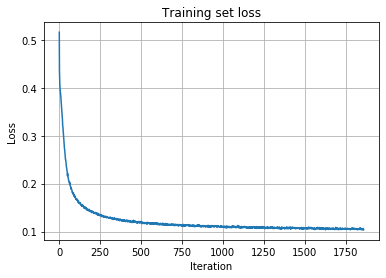

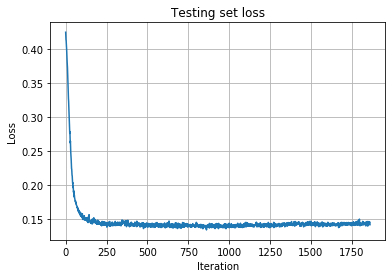

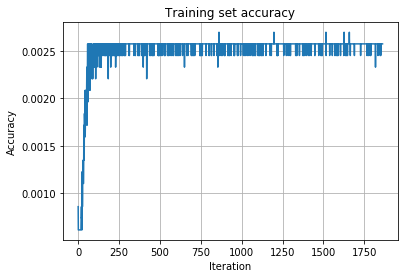

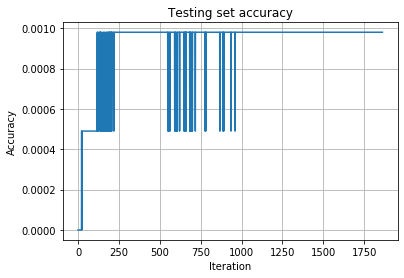

In [11]:
# Plotting loss
plt.figure(0)
plt.title("Training set loss")
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()

plt.figure(2)
plt.title("Testing set loss")
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()

# Plotting accuracy
plt.figure(1)
plt.title("Training set accuracy")
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()

plt.figure(3)
plt.title("Testing set accuracy")
plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()

## Saving the current model

In [12]:
model.save_weights('data/Models/model_'+str(loss_and_metrics[0])+'_step1.h5')
print("Saved model.")

Saved model.


## Optimizing Hyperparameters

After doing some research on hyperparameters optimization, I decided to use Talos from https://github.com/autonomio/talos, as it is very simple to use and compatible with Keras.

In [13]:
# Parameters requiered by Talos
from tensorflow.keras.activations import relu, elu

p = {'first_neuron':[5, 10, 15, 25, 35, 45, 55],
     'hidden_layers':[0, 1, 2, 3, 4, 5],
     'batch_size': [250, 500, 750, 1000],
     'epochs': [700, 1250, 2000],
     'dropout': [0, 0.25, 0.5],
     'optimizer': ['Nadam', 'Adam'],
     'losses': ['mean_absolute_error'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']
    }


In [14]:
def talos_model(X_train, Y_train, X_test, Y_test, params):
    # Defining model
    model = Sequential()
    model.add(lr.Dense(units=params['first_neuron'],
                       activation=params['activation'],
                       input_dim=X_train[0].shape[0]))
    model.add(lr.Dropout(params['dropout']))
    model.add(lr.Dense(1, activation=params['last_activation']))
    
    
    model.add(lr.Flatten())
    model.add(lr.Dense(units=1, activation='tanh'))

    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['accuracy'])    
    
    # Training model
    device = tf.device('/GPU:0') if len(tf.config.list_physical_devices('GPU')) > 0 else tf.device('/CPU:0')
    with tf.device('/GPU:0'):
        history = model.fit(X_train, Y_train, 
                        validation_data=[X_test, Y_test],
                        batch_size=params['batch_size'],
                        callbacks=[talos.utils.live()],
                        epochs=params['epochs'],
                        verbose=0)
    
    return history, model


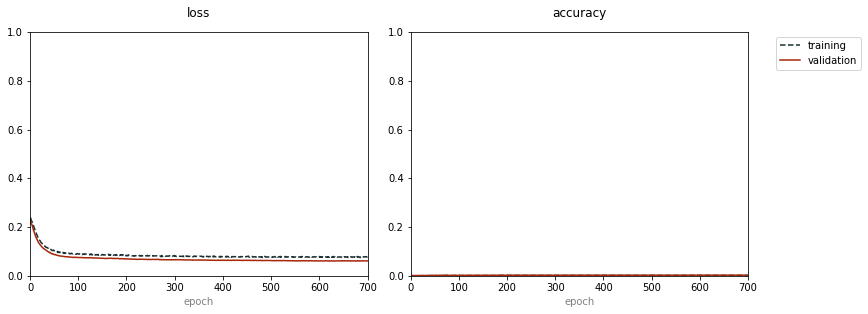

100%|██████████| 8/8 [43:13<00:00, 324.14s/it]


In [15]:
import talos

# Run the experiment
t = talos.Scan(x=X_data,
               y=Y_data,
               params=p,
               model=talos_model,
               experiment_name='talos_model',
               round_limit=8)

In [22]:
# Scan summary
t.data

,round_epochs,loss,accuracy,val_loss,val_accuracy,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,last_activation,losses,optimizer
0,700,0.103633,0.001261,0.078476,0.002615,relu,250,0.50,700,10,3,sigmoid,mean_squared_error,Adam
1,2000,0.205118,0.001682,0.183024,0.002615,elu,250,0.50,2000,25,5,sigmoid,mean_absolute_error,Nadam
2,1250,0.148524,0.001962,0.160811,0.002615,relu,1000,0.25,1250,55,0,sigmoid,mean_absolute_error,Nadam
3,2000,0.092849,0.000981,0.074830,0.002288,relu,500,0.50,2000,15,3,sigmoid,mean_squared_error,Nadam
4,1250,0.041293,0.002102,0.059281,0.002615,relu,750,0.00,1250,15,5,sigmoid,mean_squared_error,Adam
5,700,0.211093,0.001962,0.194959,0.002288,relu,250,0.25,700,10,4,sigmoid,mean_absolute_error,Nadam
6,1250,0.046085,0.001962,0.044727,0.002615,elu,750,0.25,1250,35,3,sigmoid,mean_squared_error,Adam
7,700,0.076933,0.001682,0.060973,0.002615,relu,250,0.25,700,10,5,sigmoid,mean_squared_error,Adam


In [32]:
# use Scan object as input

analyze_object = talos.Analyze(t)
# get the number of rounds in the Scan
analyze_object.rounds()

# get the highest result for any metric
analyze_object.high('val_accuracy')

# get the round with the best result
analyze_object.rounds2high('val_accuracy')

# get the best paramaters
analyze_object.best_params('val_accuracy', ['accuracy', 'loss', 'val_loss'])

array([['mean_squared_error', 700, 3, 'sigmoid', 700, 'Adam', 250, 0.5,
        'relu', 10, 0],
       ['mean_absolute_error', 2000, 5, 'sigmoid', 2000, 'Nadam', 250,
        0.5, 'elu', 25, 1],
       ['mean_absolute_error', 1250, 0, 'sigmoid', 1250, 'Nadam', 1000,
        0.25, 'relu', 55, 2],
       ['mean_squared_error', 1250, 5, 'sigmoid', 1250, 'Adam', 750, 0.0,
        'relu', 15, 3],
       ['mean_squared_error', 1250, 3, 'sigmoid', 1250, 'Adam', 750,
        0.25, 'elu', 35, 4],
       ['mean_squared_error', 700, 5, 'sigmoid', 700, 'Adam', 250, 0.25,
        'relu', 10, 5],
       ['mean_squared_error', 2000, 3, 'sigmoid', 2000, 'Nadam', 500,
        0.5, 'relu', 15, 6],
       ['mean_absolute_error', 700, 4, 'sigmoid', 700, 'Nadam', 250,
        0.25, 'relu', 10, 7]], dtype=object)